In [4]:
# Load your data
spotify_df = pd.read_csv("spotify_2023_peak_cleaned.csv")

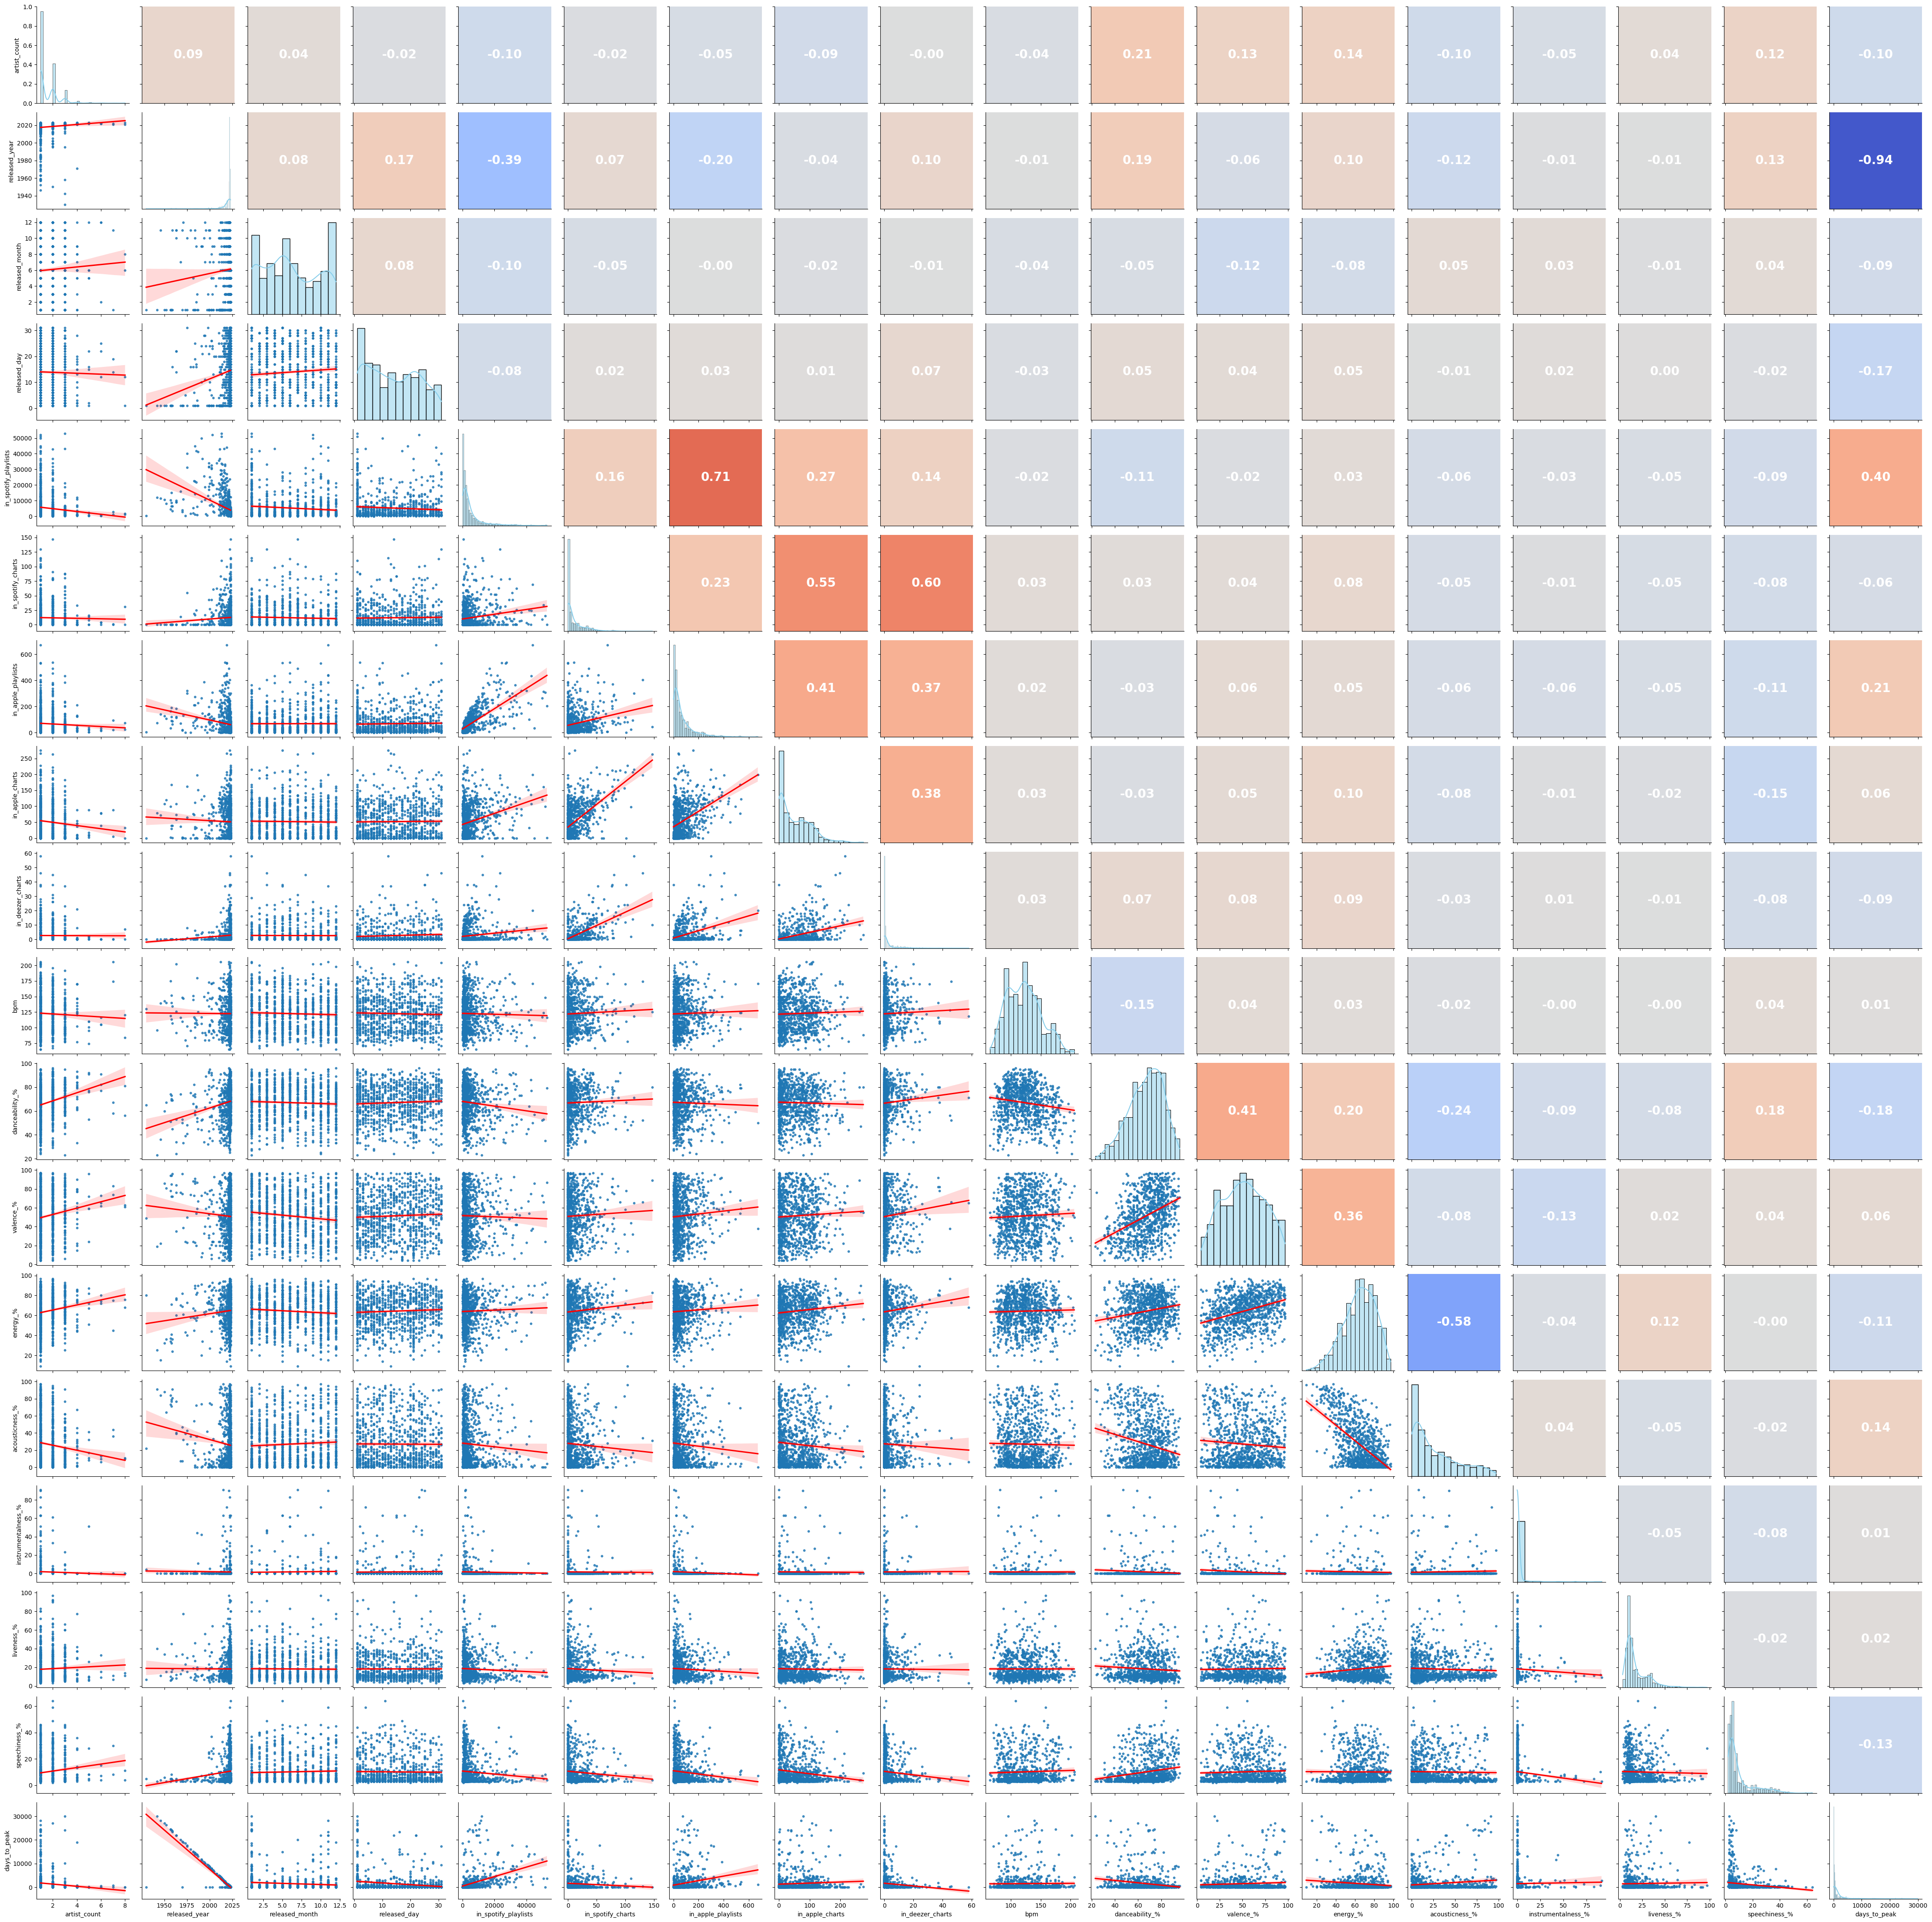

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 

def corrfunc_heatmap(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    # Set background color based on correlation
    cmap = plt.get_cmap("coolwarm")
    ax.set_facecolor(cmap((r + 1) / 2))  # normalize r to [0,1]
    ax.annotate(f"{r:.2f}", xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=20, color='white', fontweight='bold')

def custom_pairplot_with_heatmap(df, vars_to_plot):
    g = sns.PairGrid(df[vars_to_plot], diag_sharey=False)
    g.map_upper(corrfunc_heatmap)  # upper = heatmap + corr
    g.map_lower(sns.regplot, scatter_kws={'s': 10}, line_kws={'color': 'red'})  # lower = scatter+trend
    g.map_diag(sns.histplot, kde=True, color='skyblue')  # diagonal = hist
    plt.show()


# Use top features from your model
features = ['artist_count', 
            'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists',
            'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
            'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%', 'days_to_peak']
custom_pairplot_with_heatmap(spotify_df, features)

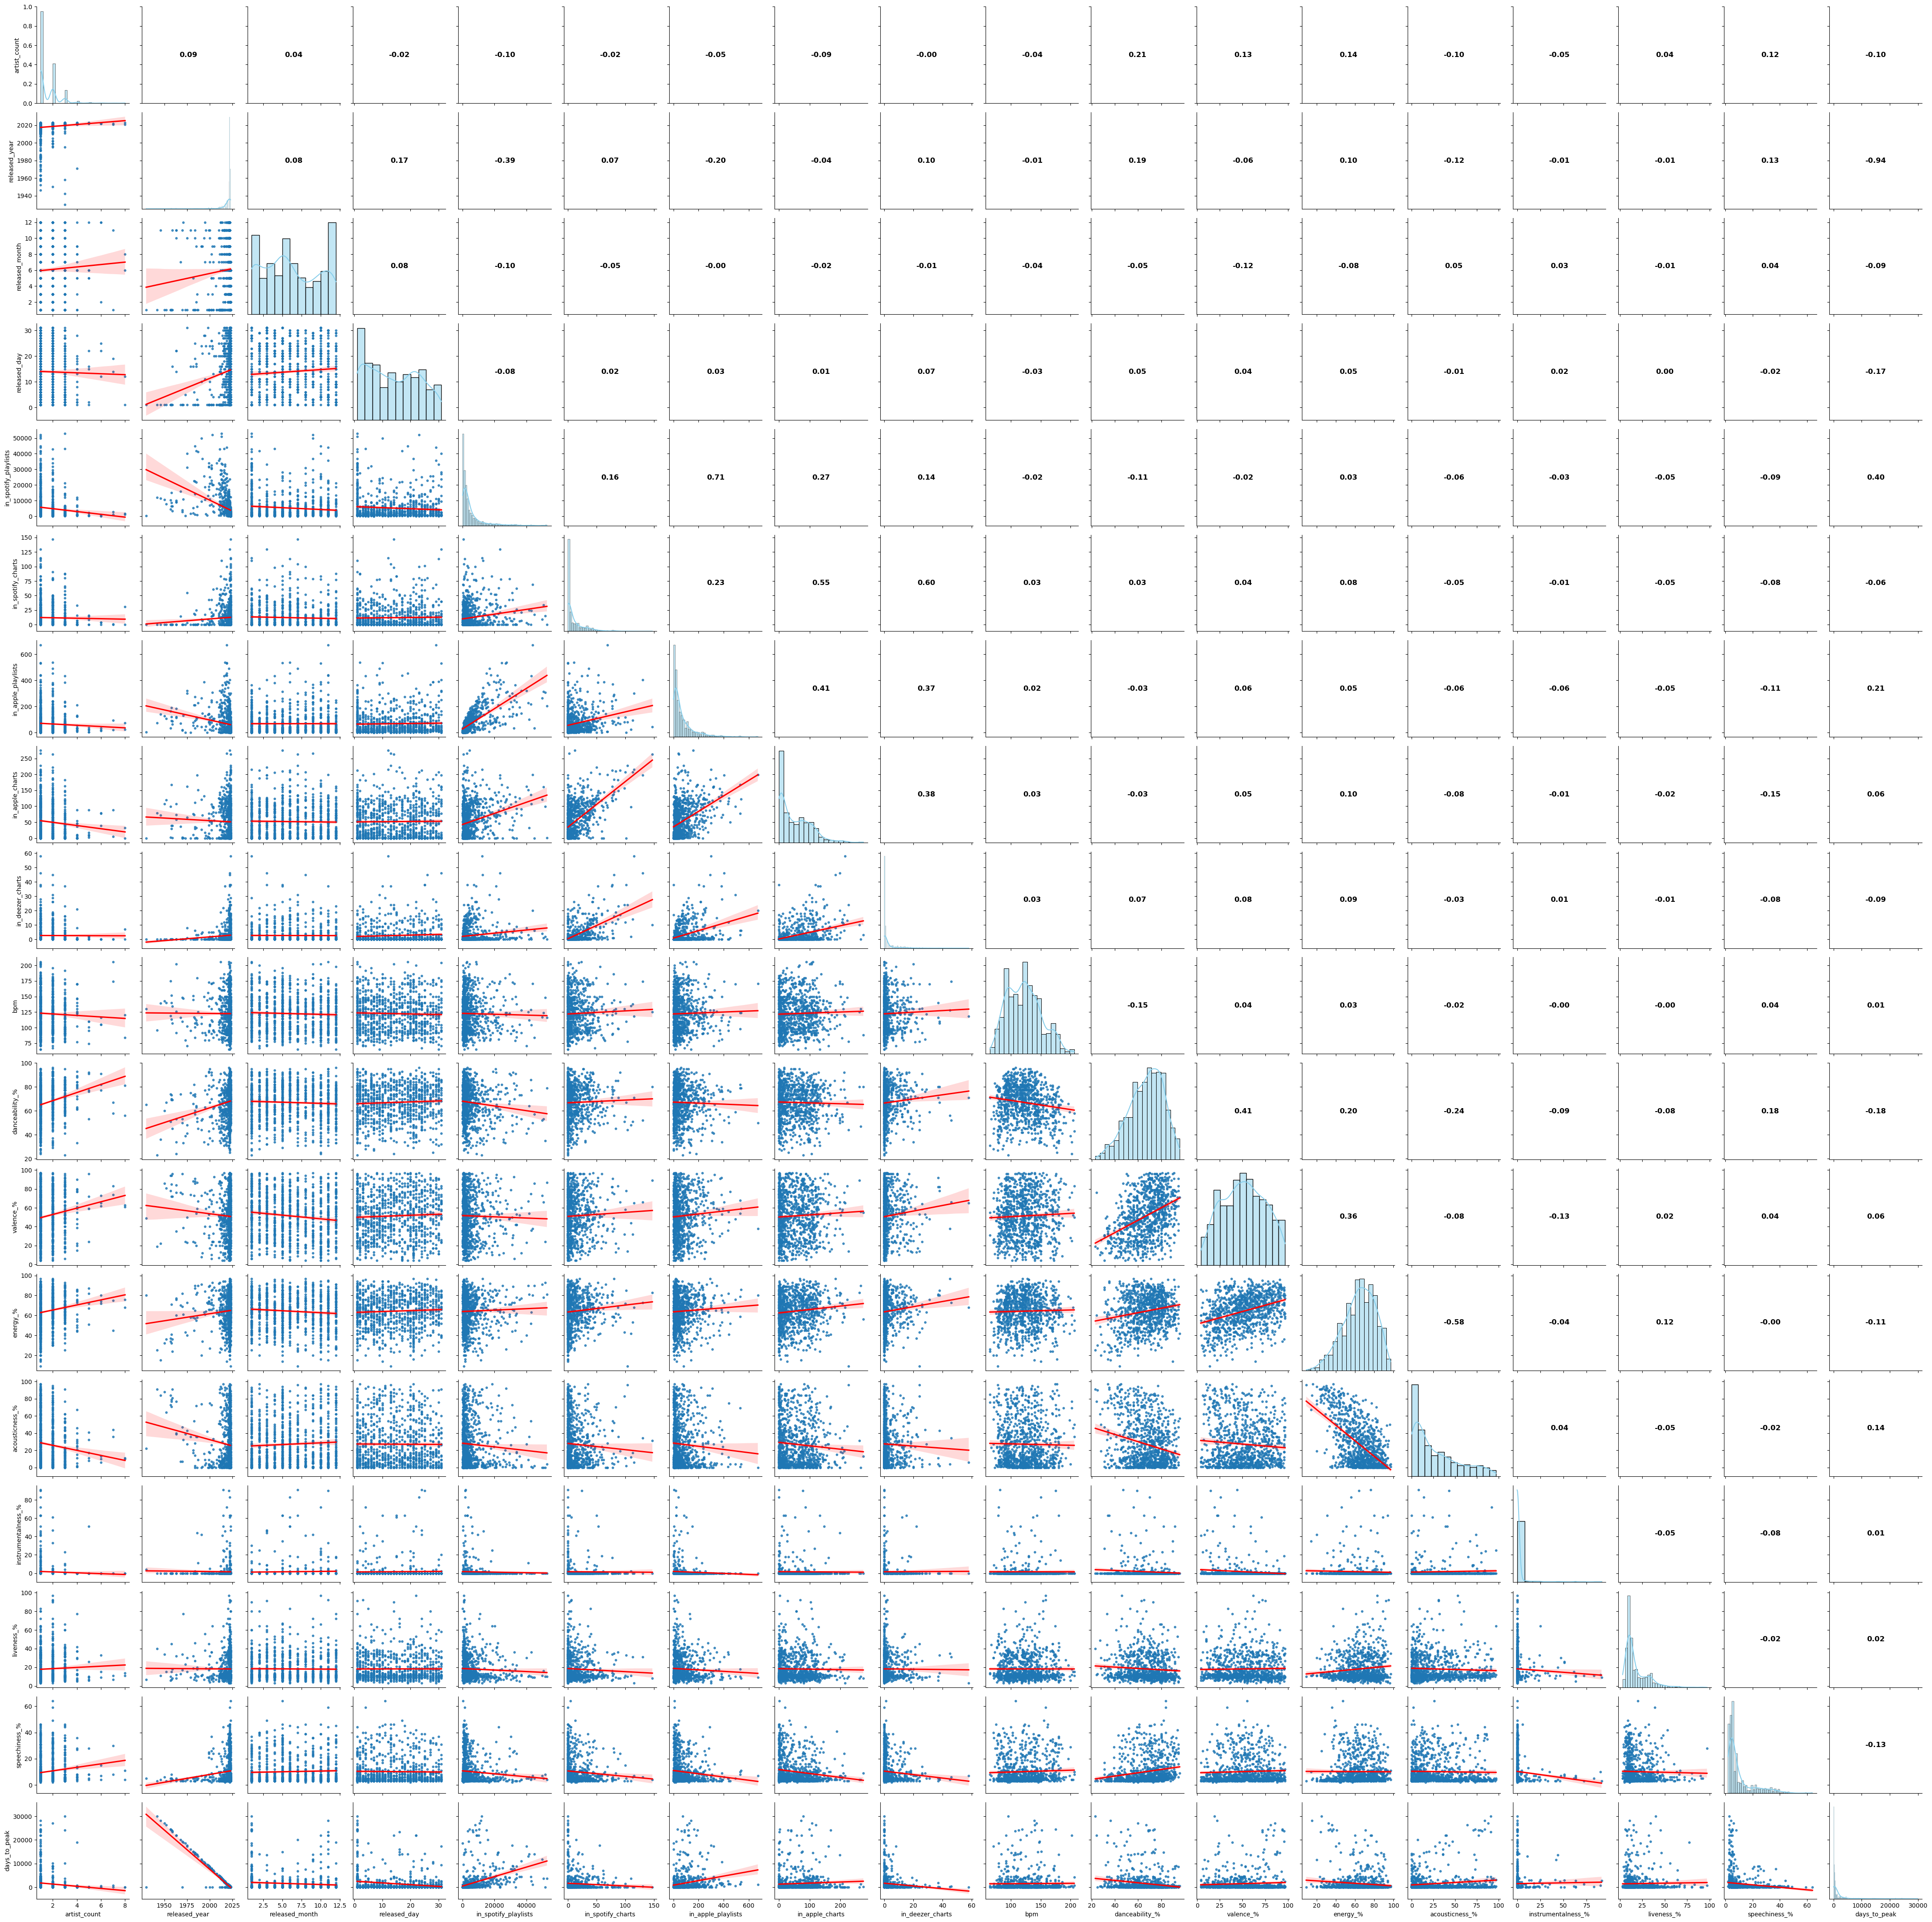

In [ ]:
from seaborn import PairGrid

def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"{r:.2f}", xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=20, fontweight='bold')

def custom_pairplot(df, vars_to_plot):
    g = sns.PairGrid(df[vars_to_plot], diag_sharey=False)
    g.map_upper(corrfunc)  # correlation coefficient
    g.map_lower(sns.regplot, scatter_kws={'s':10}, line_kws={'color':'red'})  # scatter w/ regression line
    g.map_diag(sns.histplot, kde=True, color='skyblue')  # histogram on diagonal
    plt.show()

custom_pairplot(spotify_df, features)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report



# Define features and target
features = ['artist_count', 'released_year', 'released_month', 'released_day',
            'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists',
            'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
            'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%', 'days_to_peak']
target = 'charted_billboard'

X = spotify_df[features]
y = spotify_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, param_grid={'max_depth': [10, 40], 'n_estimators': [100]}, cv=3)
rf_grid.fit(X_train, y_train)
rf_preds = rf_grid.predict(X_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid={'max_depth': [3, 5], 'n_estimators': [100], 'learning_rate': [0.1]}, cv=3)
xgb_grid.fit(X_train, y_train)
xgb_preds = xgb_grid.predict(X_test)

# Compare metrics
rf_report = classification_report(y_test, rf_preds, output_dict=True)
xgb_report = classification_report(y_test, xgb_preds, output_dict=True)

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Hit)', 'Recall (Hit)', 'F1-score (Hit)'],
    'Random Forest': [
        accuracy_score(y_test, rf_preds),
        rf_report['1']['precision'],
        rf_report['1']['recall'],
        rf_report['1']['f1-score']
    ],
    'XGBoost': [
        accuracy_score(y_test, xgb_preds),
        xgb_report['1']['precision'],
        xgb_report['1']['recall'],
        xgb_report['1']['f1-score']
    ]
})

print(comparison_df)


ModuleNotFoundError: No module named 'xgboost'